In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data", header= None)

In [3]:
df.columns= ['parents', 'has_nurs','form','children','housing','finance','social','health', 'nursery']

In [4]:
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,nursery
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [5]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,nursery
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [6]:
df['nursery'].value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: nursery, dtype: int64

In [7]:
dummies = pd.get_dummies(df.parents, drop_first= True)
 
# Concatenate the dummies to original dataframe
df = pd.concat([df, dummies], axis='columns')
 
# drop the values
df.drop(['parents'], axis='columns', inplace= True)
 
# print the dataframe
print(df)

        has_nurs      form children     housing     finance         social  \
0         proper  complete        1  convenient  convenient        nonprob   
1         proper  complete        1  convenient  convenient        nonprob   
2         proper  complete        1  convenient  convenient        nonprob   
3         proper  complete        1  convenient  convenient  slightly_prob   
4         proper  complete        1  convenient  convenient  slightly_prob   
...          ...       ...      ...         ...         ...            ...   
12955  very_crit    foster     more    critical      inconv  slightly_prob   
12956  very_crit    foster     more    critical      inconv  slightly_prob   
12957  very_crit    foster     more    critical      inconv    problematic   
12958  very_crit    foster     more    critical      inconv    problematic   
12959  very_crit    foster     more    critical      inconv    problematic   

            health     nursery  pretentious  usual  
0      rec

In [8]:
df['has_nurs'].replace(['proper', 'less_proper', 'improper', 'critical', 'very_crit'],
                        [5, 4 ,3 ,2 , 1], inplace=True)

df['form'].replace(['complete', 'completed', 'incomplete', 'foster'],
                        [ 3 ,3 ,2 , 1], inplace=True)

df['children'].replace(['more'], [4], inplace= True)
df['housing'].replace(['convenient', 'less_conv', 'critical'], [3, 2 ,1], inplace= True)
df['finance'].replace(['convenient', 'inconv'], [2 ,1], inplace= True)
df['social'].replace(['nonprob', 'slightly_prob', 'problematic'], [3, 2 ,1], inplace= True)
df['health'].replace(['recommended', 'priority', 'not_recom'], [3, 2 ,1], inplace= True)


In [9]:
nursery= df.nursery
df.drop(columns= ["nursery"] , inplace= True)

df= pd.concat([df, nursery], axis= 'columns')

In [10]:
df

,has_nurs,form,children,housing,finance,social,health,pretentious,usual,nursery
0,5,3,1,3,2,3,3,0,1,recommend
1,5,3,1,3,2,3,2,0,1,priority
2,5,3,1,3,2,3,1,0,1,not_recom
3,5,3,1,3,2,2,3,0,1,recommend
4,5,3,1,3,2,2,2,0,1,priority
...,...,...,...,...,...,...,...,...,...,...
12955,1,1,4,1,1,2,2,0,0,spec_prior
12956,1,1,4,1,1,2,1,0,0,not_recom
12957,1,1,4,1,1,1,3,0,0,spec_prior
12958,1,1,4,1,1,1,2,0,0,spec_prior


In [11]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [12]:
samples

[(       has_nurs  form children  housing  finance  social  health  pretentious  \
  1471          4     2        4        3        1       2       2            0   
  11179         3     1        4        3        2       3       2            0   
  10343         4     1        4        2        1       3       1            0   
  856           5     1        4        1        1       3       2            0   
  4664          5     3        3        2        2       3       1            1   
  ...         ...   ...      ...      ...      ...     ...     ...          ...   
  9336          5     1        1        1        1       2       3            0   
  2166          3     2        1        3        2       1       3            0   
  8199          1     3        4        1        1       3       3            1   
  9134          5     2        2        3        2       1       1            0   
  1628          4     1        3        3        2       1       1            0   
  
 

In [13]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
        
    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 
    

In [14]:
# divide dataset into training and testing sets with 10 different samples


nsamples = 10
accuracies = []
params= []
iteration= 200

kernelList = ['linear', 'rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
    #print(f"Sample {i+1}: Best accuracy = {bestAccuracy}, Best params = {bestNu, bestEpsilon, bestKernel}")
print("Done iterating!\n")

Streaming output truncated to the last 5000 lines.
fit
iteration  138
rbf 5.961681580166223 6.346851238206979
fit
iteration  139
linear 6.885684628235796 1.5486214033872825
fit
iteration  140
rbf 2.485375586359826 1.0580471961171811
fit
iteration  141
rbf 2.8338076200064033 9.171092525150108
fit
iteration  142
rbf 6.8509332455524135 6.9836103893861505
fit
iteration  143
linear 7.069962231663731 3.9851434004210837
fit
iteration  144
sigmoid 9.567026314679577 2.705852189276281
fit
iteration  145
rbf 1.1271372105204824 6.650119899029365
fit
iteration  146
sigmoid 2.5296101512201643 1.1076242215692023
fit
iteration  147
rbf 1.3625081155179541 6.167325822089726
fit
iteration  148
linear 4.600636177650646 8.856090047894998
fit
iteration  149
rbf 0.5376435727319384 2.691790079236874
fit
iteration  150
sigmoid 4.004314789972122 7.518647421283967
fit
iteration  151
sigmoid 7.320641465021799 2.9899884580018474
fit
iteration  152
linear 3.843024290409478 8.202215798595168
fit
iteration  153
linea

In [15]:
print(df_sample)

   sample#  best accuracy         c     gamma kernel
0        1          98.74  2.040215  0.419626    rbf
1        2          98.53  5.204189  0.483186    rbf
2        3          99.13  2.712117  0.172396    rbf
3        4          98.95  4.500747  0.147183    rbf
4        5          99.02  2.411568  0.281425    rbf
5        6          98.53  7.885083  0.284652    rbf
6        7          98.95  3.058020  0.417417    rbf
7        8          99.00  6.496542  0.205458    rbf
8        9          98.95  5.411300  0.187657    rbf
9       10          99.33  1.098776  0.349813    rbf


In [16]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]


In [17]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [18]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

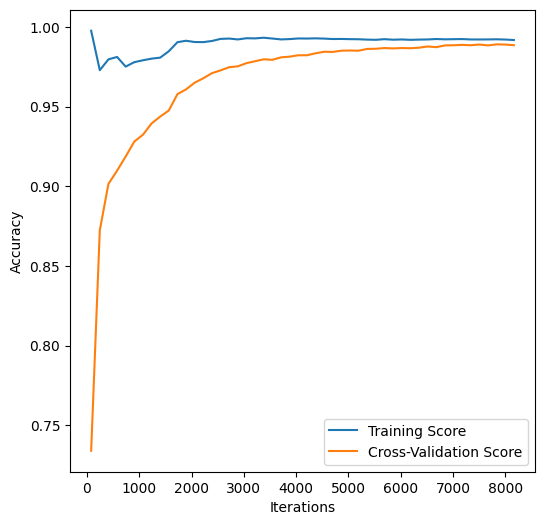

In [19]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()